In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.shape

(8523, 12)

In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# identifying Null Values


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [9]:
for i in df.columns:
     print(len(df[i].unique()))
     


1559
416
5
7880
16
5938
10
9
4
3
4
3493


In [10]:
df['Outlet_Size'].mode()[0]

'Medium'

In [11]:
#replacing null values
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna('Medium' , inplace=True)





In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
# unique values in each column


for i in df.columns:
    print (df[i].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
[ 9.3         5.92       17.5        19.2         8.93       10.395
 13.65       12.85764518 16.2        11.8        18.5        15.1
 17.6        16.35        9.         13.35       18.85       14.6
 13.85       13.          7.645      11.65        5.925      19.25
 18.6        18.7        17.85       10.          8.85        9.8
 13.6        21.35       12.15        6.42       19.6        15.85
  7.39       10.195       9.895      10.895       7.905       9.195
  8.365       7.97       17.7        19.35        8.645      15.6
 18.25        7.855       7.825       8.39       12.85       19.
  5.905       7.76       16.75       15.5         6.055       6.305
 20.85       20.75        8.895      19.7         8.75       13.3
  8.31       19.75       17.1        10.5         6.635      14.15
  8.89        9.1         7.5        16.85        7.485      11.6
 12.65       20.25        8.6        12.6         8.88       20.5
 13.5         

In [16]:
df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [18]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [24]:
df['Item_Type'].replace(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'],['Drinks','Drinks','Non consummable','Non consummable','Non consummable','Non consummable','Food','Food','Food','Non consummable','Drinks','Drinks','Food','Food','Non consummable','Food'],inplace=True)

In [27]:
df['Item_Type'].unique()

array(['Drinks', 'Non consummable', 'Food'], dtype=object)

In [26]:
df['Item_Type'].replace(['Non consummuable'],['Non consummable'],inplace=True)

In [28]:
# numerical and categorical columns

numerical_columns=[feature for feature in df.columns if df[feature].dtype !='O']

categorical_columns=[feature for feature in df.columns if df[feature].dtype=='O']

year_feature=[feature for feature in numerical_columns if 'Yr' in feature or 'Year' in feature]


discrete_feature=[feature for feature in numerical_columns if len(df[feature].unique())<=25 and feature not in year_feature]

continuous_feature=[feature for feature in numerical_columns if len(df[feature].unique())>25]


In [29]:
numerical_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [30]:
# creating boxplots for numerical_columns
df1=df.loc[:,['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']]

In [31]:
df1

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


<AxesSubplot:xlabel='variable', ylabel='value'>

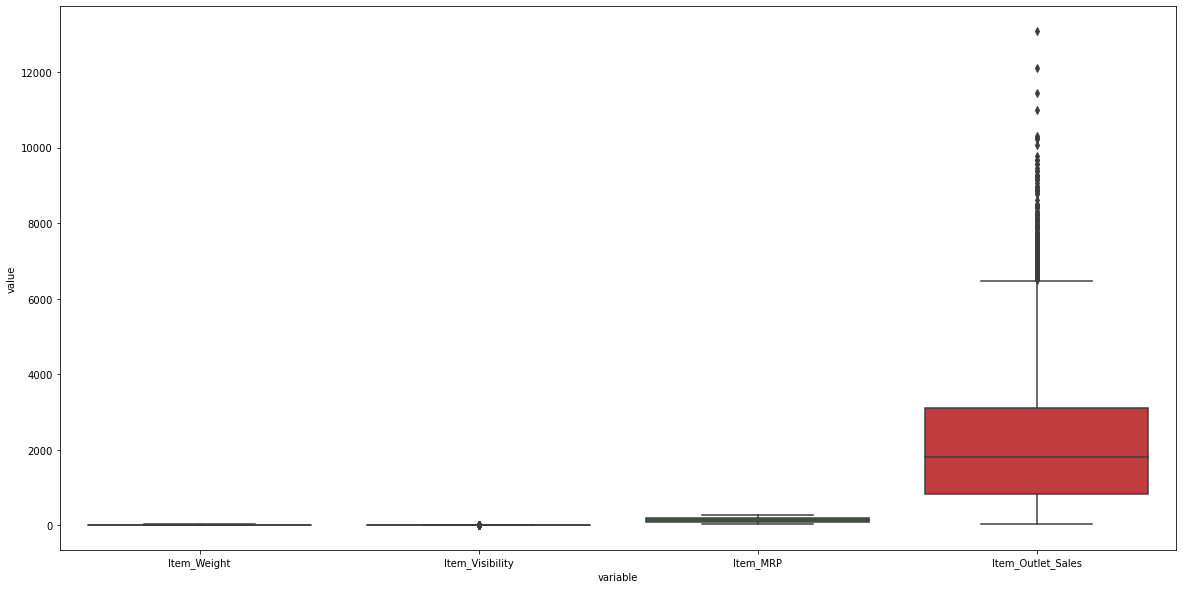

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(x='variable',y='value',data=pd.melt(df1))

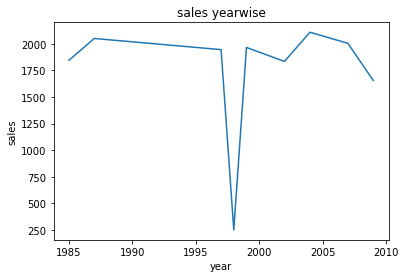

In [33]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot()
plt.xlabel('year')
plt.ylabel('sales')
plt.title('sales yearwise')
plt.show()

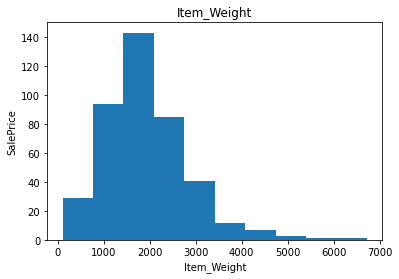

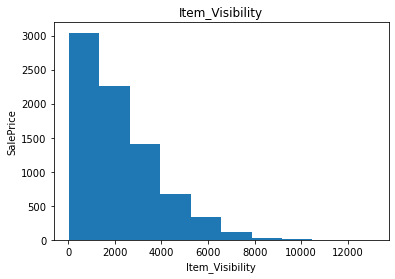

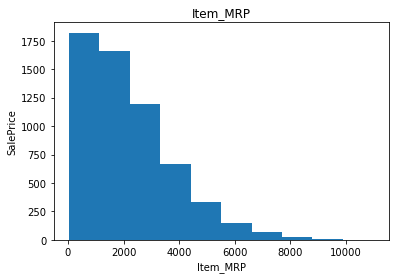

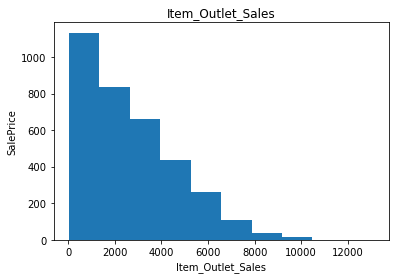

In [34]:
data=df.copy()
for feature in continuous_feature:
    data.groupby(feature)['Item_Outlet_Sales'].median().plot.hist()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

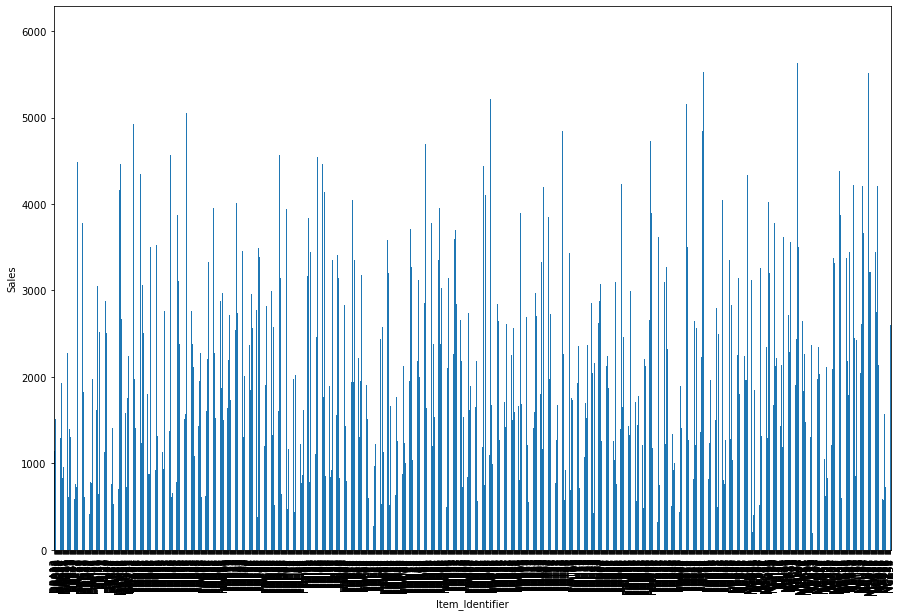

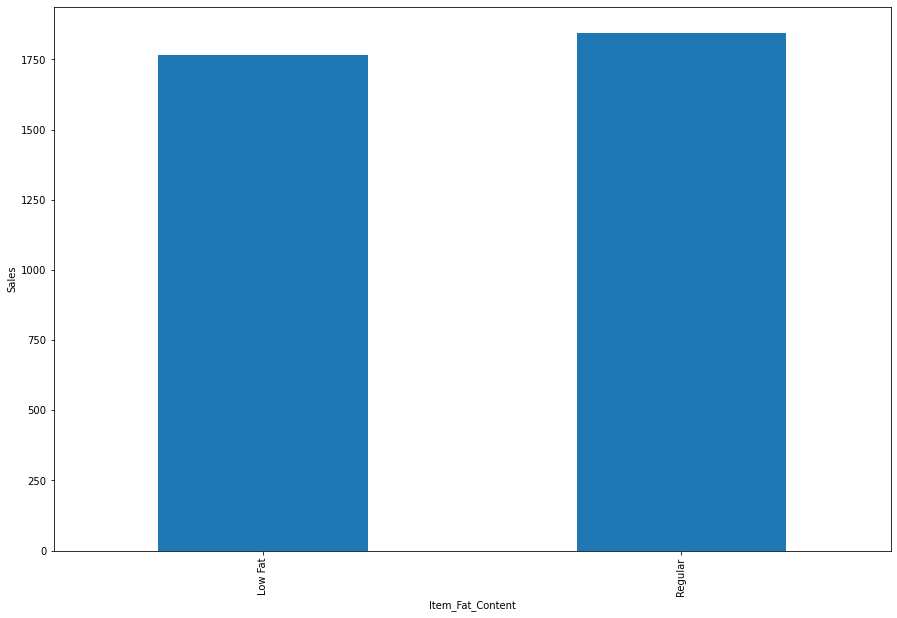

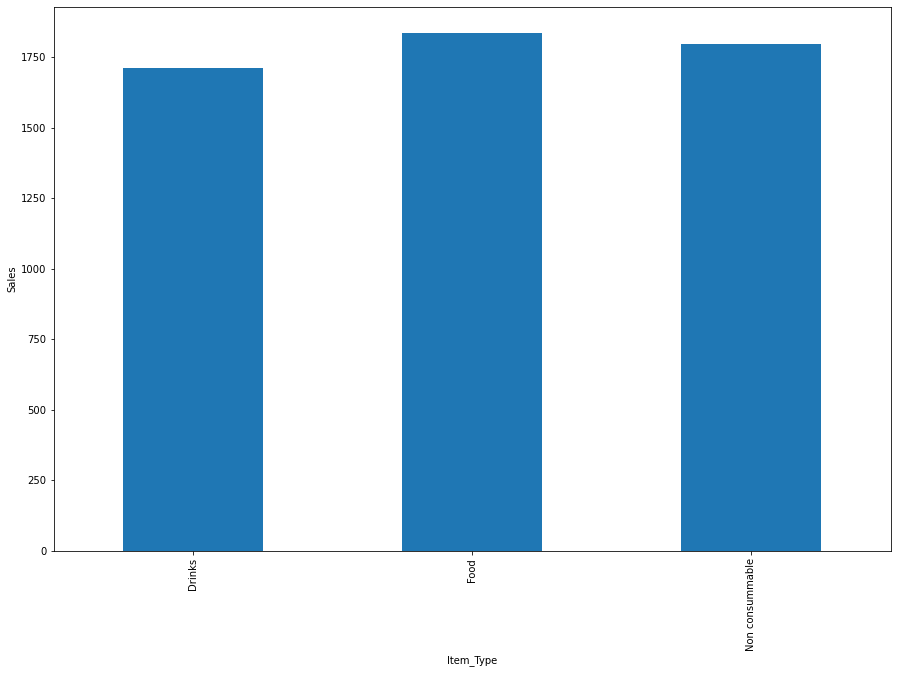

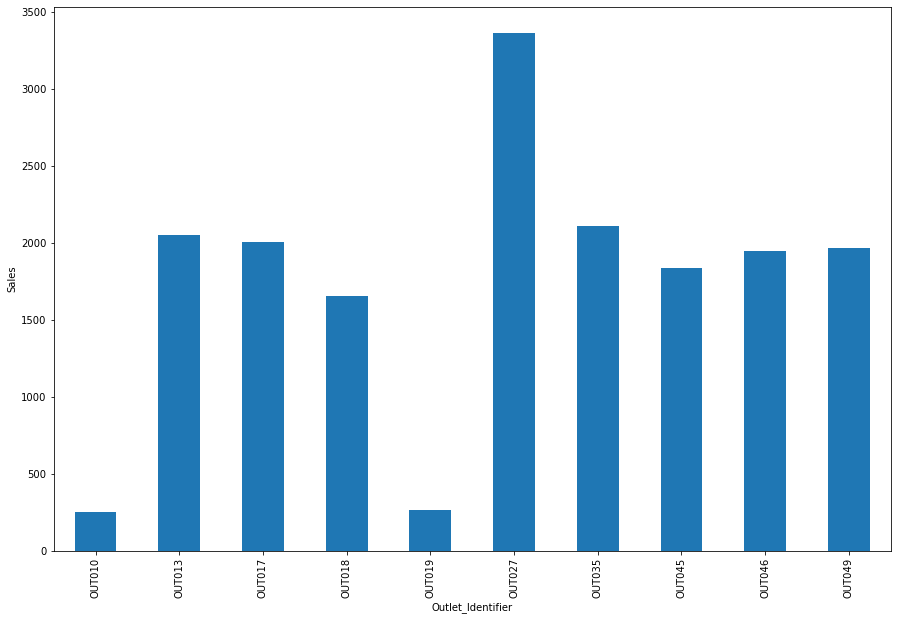

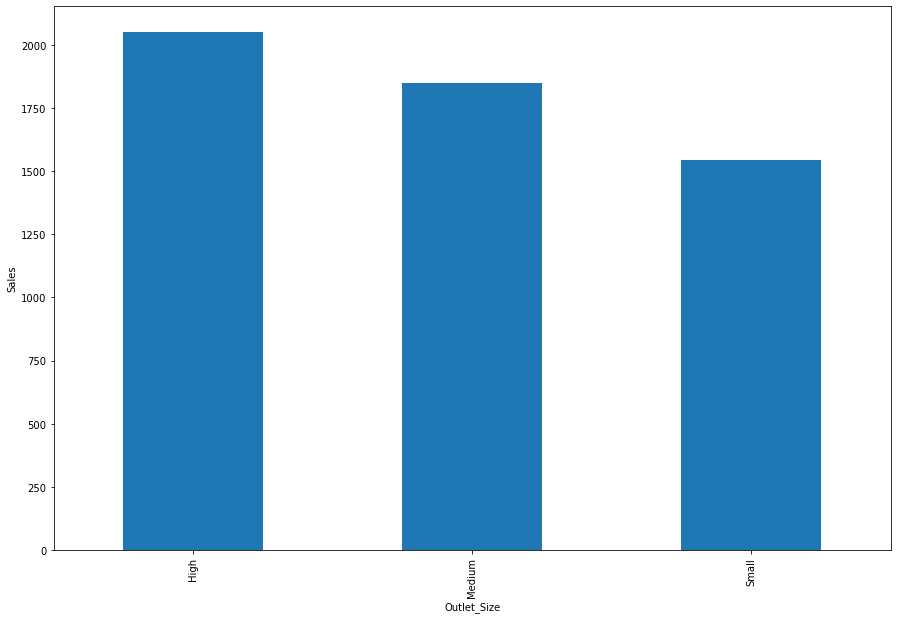

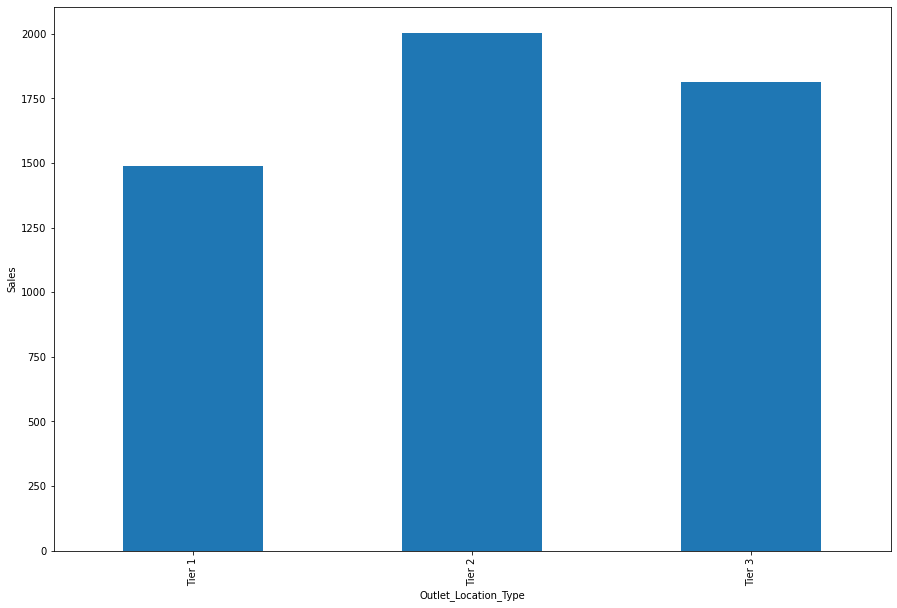

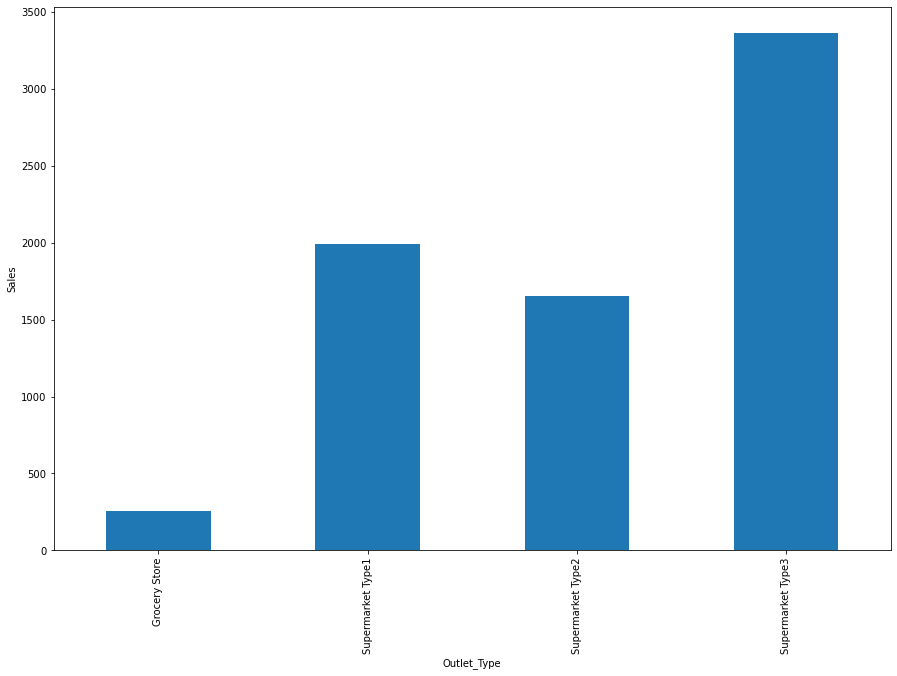

In [35]:
# categorical_feature
data=df.copy()
for feature in categorical_columns:
    plt.figure(figsize=(15,10))
    df.groupby(feature)['Item_Outlet_Sales'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.show()

In [36]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Univariate Analysis

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

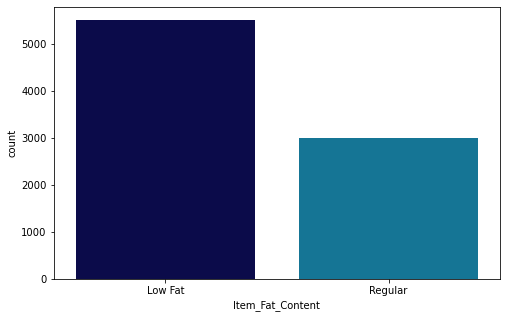

In [37]:
#Item Fat Content
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=df,palette='ocean')

#### There are more Low Fat items than Regular items.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

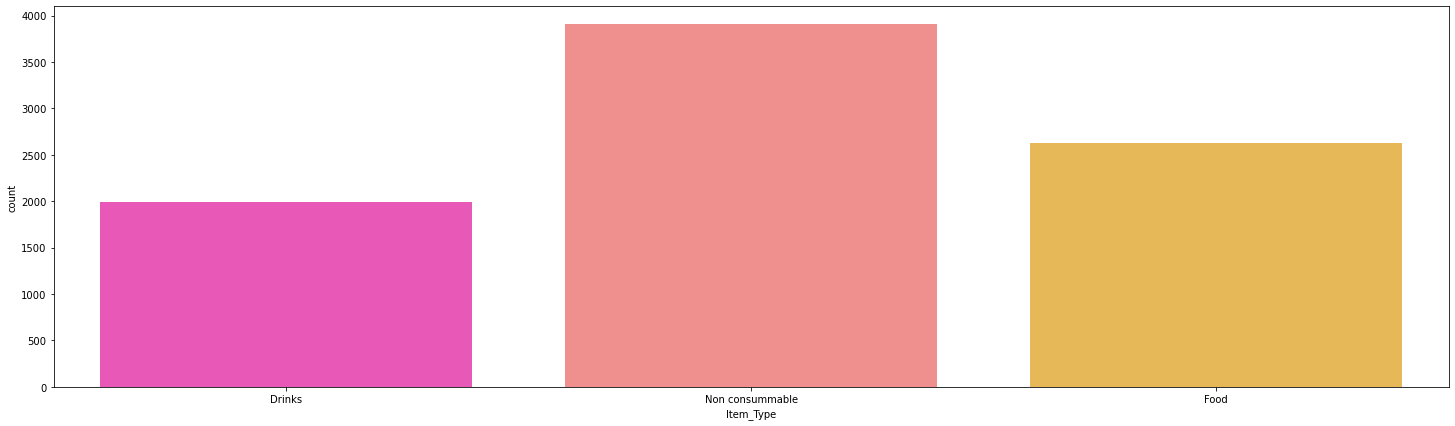

In [38]:
# Item Type
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=df,palette='spring')

#### Fruits Vegetables and snack foods have most sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

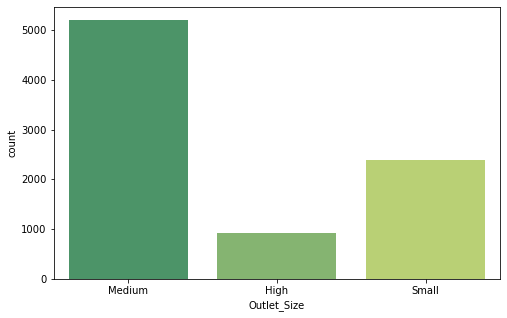

In [39]:
#Outlet Type
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=df,palette='summer')

#### Most of the outlets are of medium size

C:\Users\payal\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

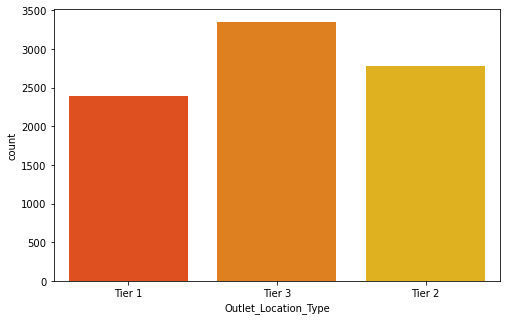

In [28]:
#Outlet Location Type
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=df,palette='autumn')

#### Tire 3 has most count of Outlet_location_type

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

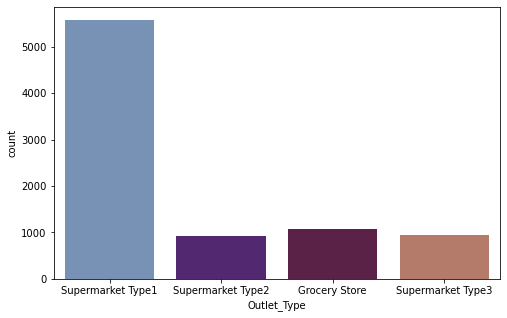

In [40]:
#Outlet Type
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=df,palette='twilight')

#### Supermarket type1 count is the most of Outlet_Type

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

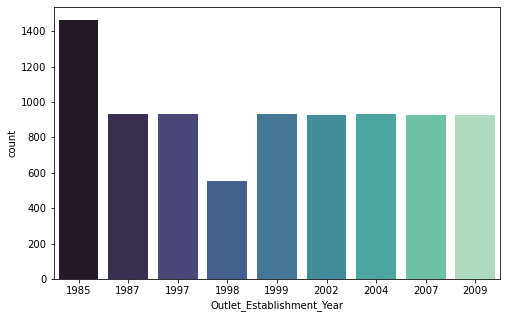

In [41]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Establishment_Year',data=df,palette='mako')

#### More outlets are established in the year 1985 and they are running for more than 37 years.

## Bivariate Analysis

In [31]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

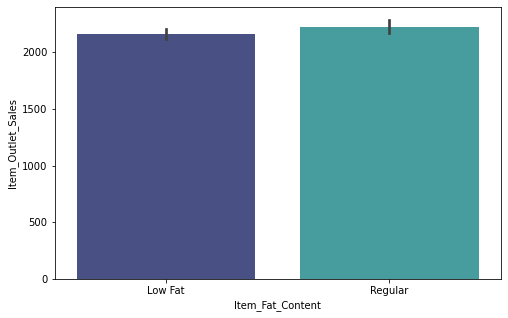

In [42]:
# Item Fat Content
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=df,palette='mako')

* The Item Outles sales are high for both Low Fat and Regular Item types.

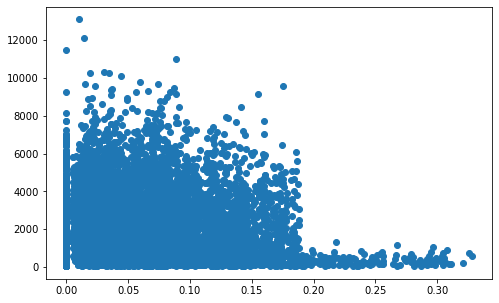

In [43]:
#Item Visibility
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=df)

* Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

### Lets consider it like missing information and impute it with mean visibility of that product.

In [44]:
df['Item_Visibility']=df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())


Text(0, 0.5, 'Item Visibility')

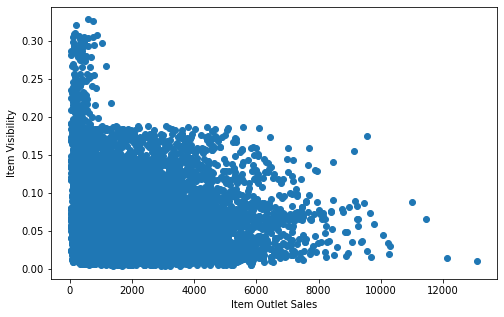

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=df)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

### We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.

### Item Type

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

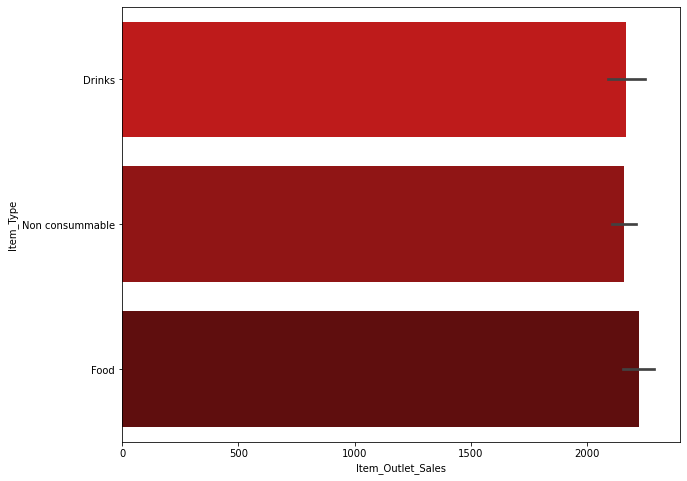

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df,palette='flag')


* The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

Text(0, 0.5, 'Item Outlet Sales')

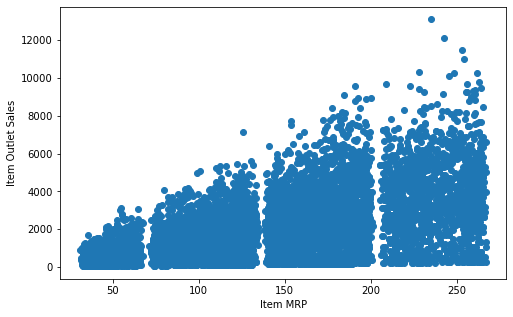

In [47]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=df)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

* Items MRP ranging from 200-250 dollars is having high Sales.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

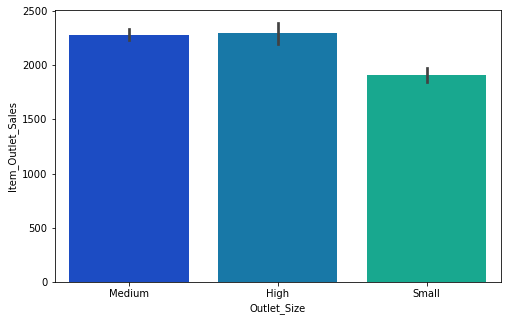

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df,palette='winter')

* The Outlet Sales is maximum for Medium and High sized Outlets.
* The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

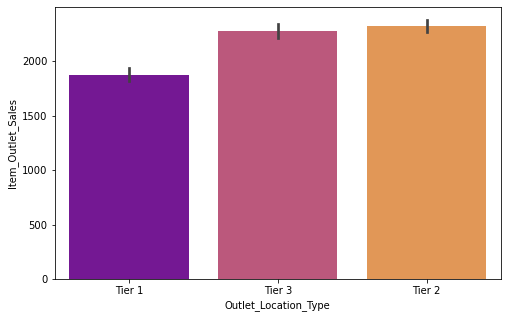

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df,palette='plasma')

* The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets. 

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

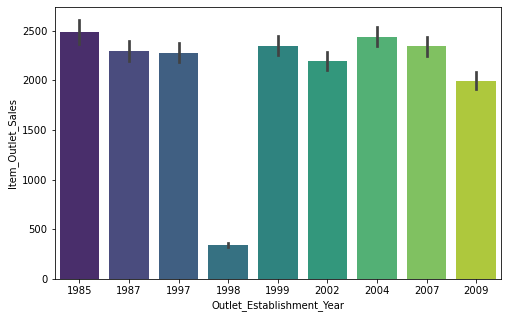

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df,palette='viridis')

* It is quiet evident that Outlets established 35 years before is having good Sales margin.
* We also have a outlet which was established before 22 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

## Multivariate Analysis

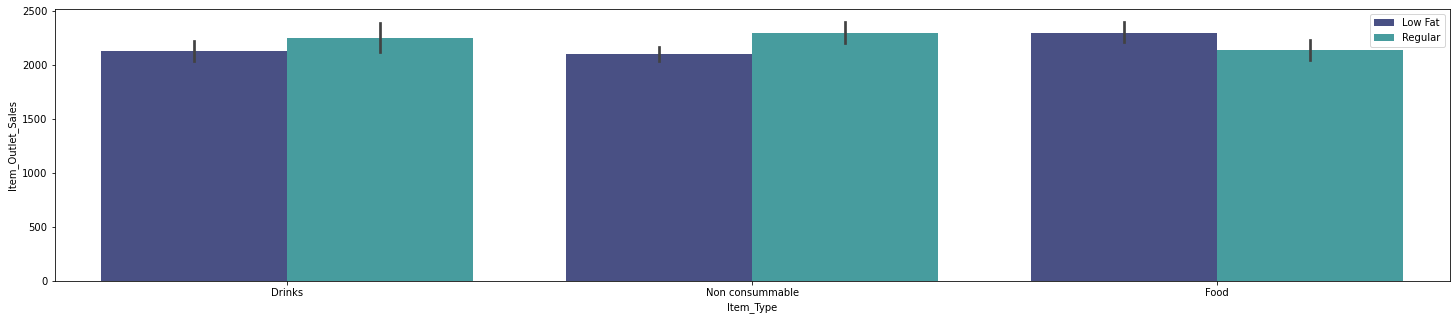

In [51]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=df,palette='mako')
plt.legend()

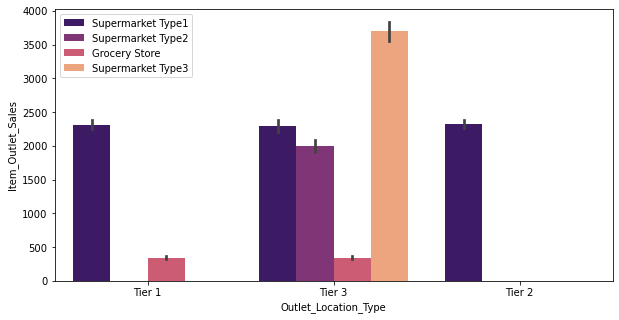

In [52]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df,palette='magma')
plt.legend()

* The Tier-3 location type has all types of Outlet type and has high sales margin.

## Feature Engineering

In [53]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Drinks,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Non consummable,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Non consummable,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Non consummable,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [54]:
data=df[['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']]

In [55]:
df1=pd.get_dummies(data,drop_first=True)

In [56]:
df1

,Item_Fat_Content_Regular,Item_Type_Food,Item_Type_Non consummable,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
8519,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
8520,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0
8521,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [57]:
df.drop(columns=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Outlet_Establishment_Year','Item_Identifier'],axis=1,inplace=True)

In [58]:
train_data=df.join(df1)

In [60]:
train_data


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Food,Item_Type_Non consummable,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,...,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0.016047,249.8092,3735.1380,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,48.2692,443.4228,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,2097.2700,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.066132,182.0950,732.3800,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.930,0.066132,53.8614,994.7052,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,549.2850,1,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,1845.5976,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [61]:
x=train_data.drop('Item_Outlet_Sales',axis=1)
y=train_data['Item_Outlet_Sales']

In [62]:
x

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Food,Item_Type_Non consummable,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,...,Outlet_Type_Supermarket Type3,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0.016047,249.8092,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,48.2692,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.066132,182.0950,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8.930,0.066132,53.8614,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,1,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [63]:
#feature scaling with training data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=scaler.fit_transform(x)

In [64]:
x1

array([[-0.84187169, -1.11135787,  1.74745381, ..., -0.34976195,
        -0.34997319,  2.85736174],
       [-1.64170589, -1.04506727, -1.48902325, ..., -0.34976195,
        -0.34997319, -0.34997319],
       [ 1.09855449, -1.09673346,  0.01004021, ..., -0.34976195,
        -0.34997319,  2.85736174],
       ...,
       [-0.53424315, -0.71867224, -0.89720755, ..., -0.34976195,
        -0.34997319, -0.34997319],
       [-1.33644372,  1.53896846, -0.60797692, ..., -0.34976195,
        -0.34997319, -0.34997319],
       [ 0.45963367, -0.51981553, -1.05226104, ..., -0.34976195,
         2.85736174, -0.34997319]])

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn .tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline






#regression model
reg=LinearRegression()

#randomforest
forest=RandomForestRegressor(n_estimators= 4000,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'sqrt',
 max_depth= 20,
 ccp_alpha= 0.5,
 bootstrap= True)


#Decision tree
tree=DecisionTreeRegressor(min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 5,
 ccp_alpha= 1)



#svr
svr=SVR()


#knn
knn=KNeighborsRegressor(n_neighbors=9)


#xg
xg=XGBRegressor()


#grad
grad=GradientBoostingRegressor(n_estimators= 4000,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features='sqrt',
 max_depth= 20,
 ccp_alpha= 0.5
 )

#ex
ex=ExtraTreesRegressor(n_estimators= 1400,
 min_samples_split= 10,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 5,
 bootstrap=False)


def algoapplying(object,x,y):
    try:                
        object.fit(x,y)
        pred1=object.predict(x)
        a=r2_score(y,pred1)
        b=mean_absolute_error(y,pred1)/100
        return a,b
        
    
    except Exception as e:
        print(e)


In [67]:
print(f"the acuracy of regression model is {algoapplying(reg,x_train,y_train)}.")
print(f"the acuracy of randomforest model is {algoapplying(forest,x_train,y_train)}.")
print(f"the acuracy of decision tree model is {algoapplying(tree,x_train,y_train)}.")
print(f"the acuracy of svm model is {algoapplying(svr,x_train,y_train)}.")
print(f"the acuracy of knn model is {algoapplying(knn,x_train,y_train)}.")
print(f"the acuracy of xgboost model is {algoapplying(xg,x_train,y_train)}.")
print(f"the acuracy of gradient boost model is {algoapplying(grad,x_train,y_train)}.")
print(f"the acuracy of extratrees model is {algoapplying(ex,x_train,y_train)}.")

the acuracy of regression model is (0.5577807338107508, 8.3910883903993).
the acuracy of randomforest model is (0.8379749462193924, 4.7356608591048).
the acuracy of decision tree model is (0.6057925251388004, 7.493595935186326).
the acuracy of svm model is (0.02678288459716971, 12.504360671675261).
the acuracy of knn model is (0.6322601702252513, 7.296625373325511).
the acuracy of xgboost model is (0.856555255896349, 4.662590396328344).
the acuracy of gradient boost model is (0.9996414219117983, 0.2478323834612166).
the acuracy of extratrees model is (0.6014560701856855, 7.560431974127771).


In [68]:
print(f"the acuracy of regression model is {algoapplying(reg,x_test,y_test)}.")
print(f"the acuracy of randomforest model is {algoapplying(forest,x_test,y_test)}.")
print(f"the acuracy of decision tree model is {algoapplying(tree,x_test,y_test)}.")
print(f"the acuracy of svm model is {algoapplying(svr,x_test,y_test)}.")
print(f"the acuracy of knn model is {algoapplying(knn,x_test,y_test)}.")
print(f"the acuracy of xgboost model is {algoapplying(xg,x_test,y_test)}.")
print(f"the acuracy of gradient boost model is {algoapplying(grad,x_test,y_test)}.")
print(f"the acuracy of extratrees model is {algoapplying(ex,x_test,y_test)}.")

the acuracy of regression model is (0.5935798950445729, 8.162503264957664).
the acuracy of randomforest model is (0.8363511957433669, 4.871397650084189).
the acuracy of decision tree model is (0.6593793580674407, 7.0403744293147215).
the acuracy of svm model is (-0.031931334653934496, 12.890117906093646).
the acuracy of knn model is (0.6241945814340991, 7.631374868426198).
the acuracy of xgboost model is (0.9743668180332575, 1.9651171395334104).
the acuracy of gradient boost model is (0.9999206713022689, 0.12235108658287323).
the acuracy of extratrees model is (0.6551119702748451, 7.2209321619324704).


AS THE GRADIENT BOOSTING MODEL IS GIVING BEST ACCURACY WITH TRAINING AND TESTING DATA WE WILL CHOOSE IT


In [69]:
import pickle
file='sale_model.pickle'
pickle.dump(grad,open(file,'wb'))